# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print for logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities city_data list to retrieve weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric" #set units to metric for temperature
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to  record count
    record_count += 1

    # Run  API request for each city returned in JSON
    try:
        # Parse  JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append  City information into city_data list
        city_data.append(
                        {"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          }
        )

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kapenguria
Processing Record 3 of Set 1 | muisne
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | mount pearl
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | tura
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | hayma'
City not found. Skipping...
Processing Record 12 of Set 1 | noumea
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | omis
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | trujillo
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | yorkton
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | badger
Processing Record 22 of Set 1 | 

In [8]:
# Convert  cities' weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,6.05,96,100,7.63,TF,1702352501
1,kapenguria,1.2511,35.0895,14.23,81,88,1.57,KE,1702352501
2,muisne,0.6000,-80.0333,25.22,89,61,2.83,EC,1702352501
3,thompson,55.7435,-97.8558,-14.91,72,40,6.69,CA,1702352208
4,blackmans bay,-43.0167,147.3167,23.62,45,100,3.53,AU,1702352501


In [10]:
# Export  City_Data to csv file
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.05,96,100,7.63,TF,1702352501
1,kapenguria,1.2511,35.0895,14.23,81,88,1.57,KE,1702352501
2,muisne,0.6000,-80.0333,25.22,89,61,2.83,EC,1702352501
3,thompson,55.7435,-97.8558,-14.91,72,40,6.69,CA,1702352208
4,blackmans bay,-43.0167,147.3167,23.62,45,100,3.53,AU,1702352501


In [26]:
date_run = time.gmtime(int(city_data_df.loc[city_data_df["City"] == "georgetown"]["Date"]))
print(f"{date_run[0]}")
#city_data_df.columns

2023


C:\Users\tpreg\AppData\Local\Temp\ipykernel_22868\1578500818.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  date_run = time.gmtime(int(city_data_df.loc[city_data_df["City"] == "georgetown"]["Date"]))


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

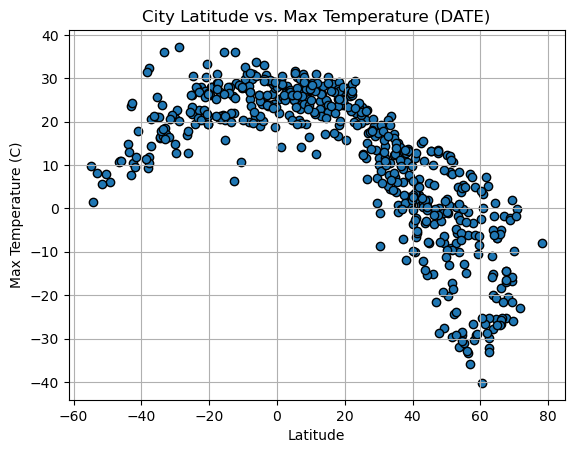

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Max Temperature (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

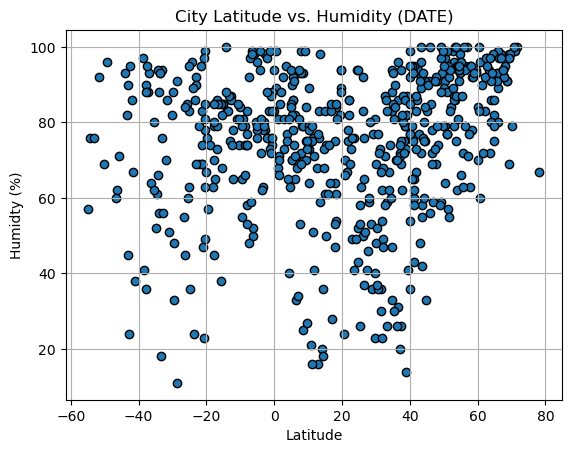

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Humidty (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

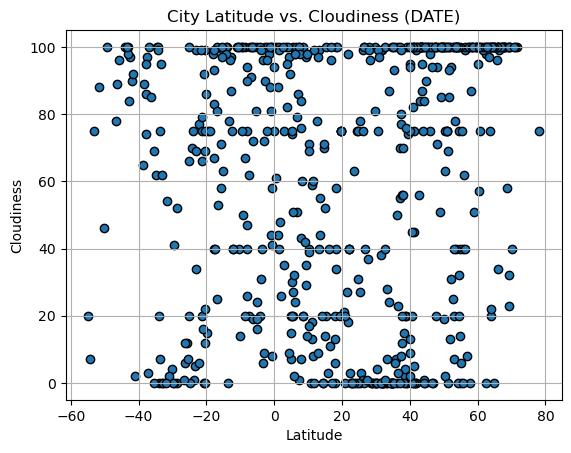

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

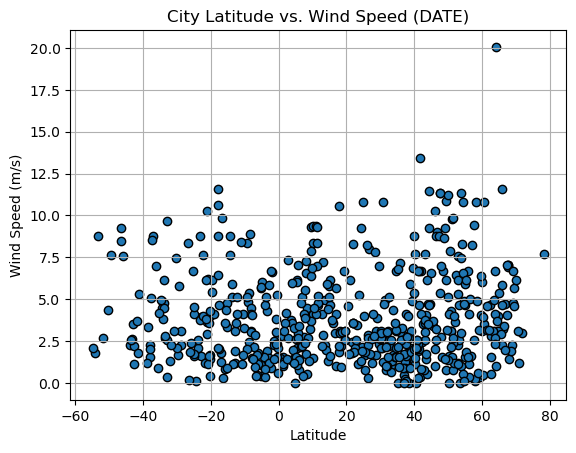

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (DATE)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def lin_regress(x_vals, y_vals, y_label):
    (slope, intercept, rval, pval, stderr) = linregress(x_vals, y_vals)

    regress_vals = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot best fit line 
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals,regress_vals,"r-")
    # Display regression line equation
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red",xycoords="figure points") #

    plt.xlabel(f"Latitude")
    plt.ylabel(f"{y_label}")
    print(f"The r-value is: {rval}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapenguria,1.2511,35.0895,14.23,81,88,1.57,KE,1702352501
2,muisne,0.6000,-80.0333,25.22,89,61,2.83,EC,1702352501
3,thompson,55.7435,-97.8558,-14.91,72,40,6.69,CA,1702352208
5,mount pearl,47.5166,-52.7813,12.69,91,100,11.32,CA,1702352501
8,tura,25.5198,90.2201,21.82,63,3,0.77,IN,1702352502


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,6.05,96,100,7.63,TF,1702352501
4,blackmans bay,-43.0167,147.3167,23.62,45,100,3.53,AU,1702352501
6,edinburgh of the seven seas,-37.0676,-12.3116,14.30,93,100,8.80,SH,1702352502
7,puerto natales,-51.7236,-72.4875,5.58,92,88,2.66,CL,1702352502
9,grytviken,-54.2811,-36.5092,1.41,76,7,1.76,GS,1702352502


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8441065833975374


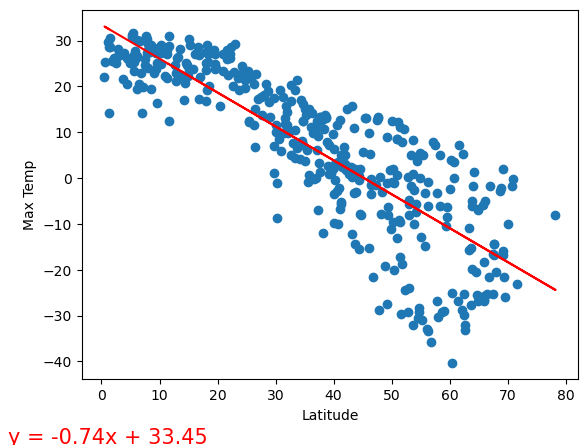

In [21]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp")

The r-value is: 0.6178356048934012


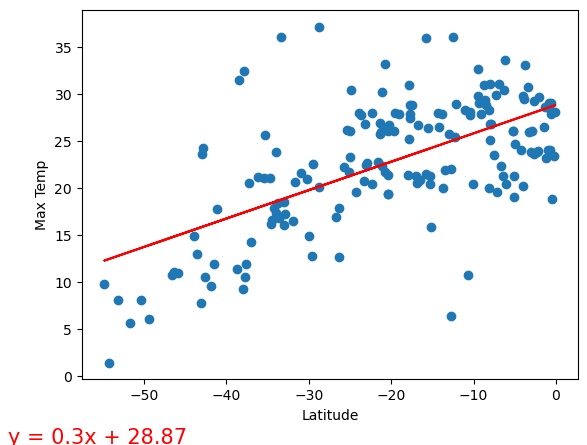

In [22]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp")

**Discussion about the linear relationship:** Plots for both northern and southern hemispheres suggest a strong linear relationship between latitude and maximum temperatures. The strong negative r-value in the northern hemisphere (-0.844) indicates a moderate negative relationship where temperatures decrease with increased distance from the equator. The slightly less strong r-value in the southern hemisphere (0.617) indicates a similar correlation but in the positive direction. However, due to negative latitudinal values in the southern hemisphere -- and shown by the regression line -- the r-vale and scatter plot re-enforce the results from the northern hemispher, i.e. distance from the equator has a negative impact on temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34569000888206375


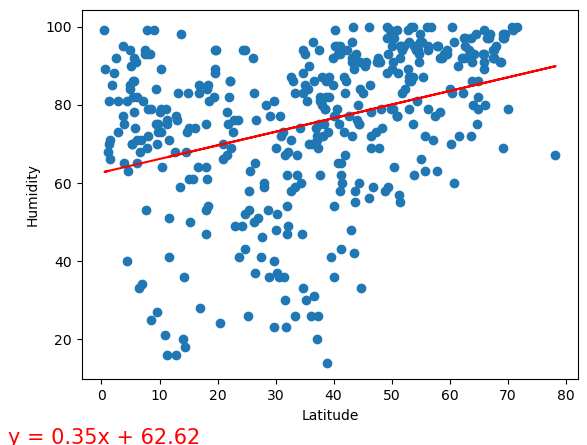

In [23]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity")

The r-value is: 0.17769578591981167


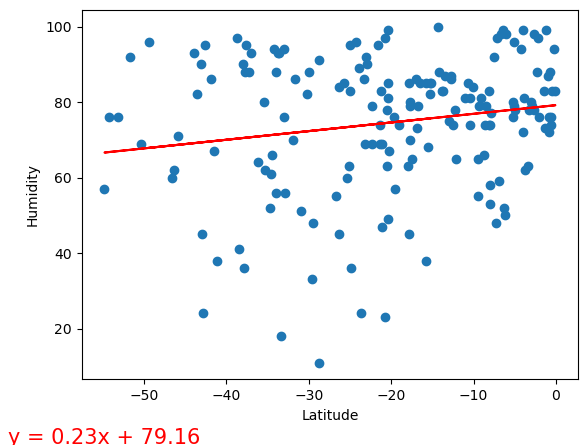

In [24]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** Linear regression analysis of humidty in the northern hemisphere suggests a weak positive relationship with latitude (r-valeu: 0.346). The relationship of the two variables in the southern hemisphere is very weak (0.178) and again positive. However, due to negative latitudes, regression suggests an inverse relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2670096901813402


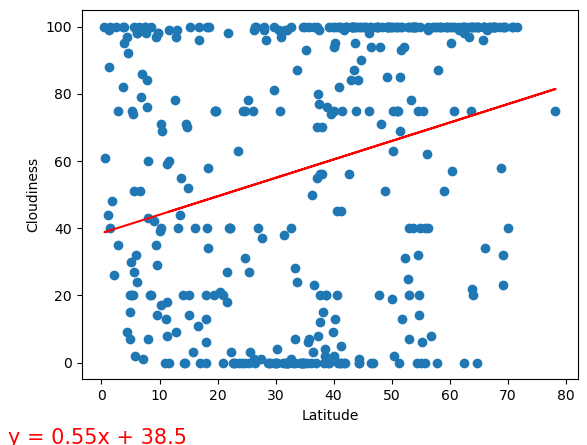

In [25]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness")

The r-value is: 0.09398917968528882


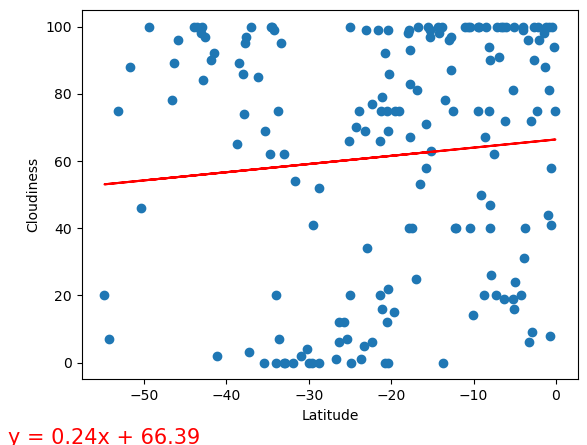

In [26]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness")

**Discussion about the linear relationship:** Linear regression suggests no or very weak relationship between cloudiness and latitude in both the northern and southern hemispheres (r-values of 0.267 and 0.094, respectively).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11214406572191445


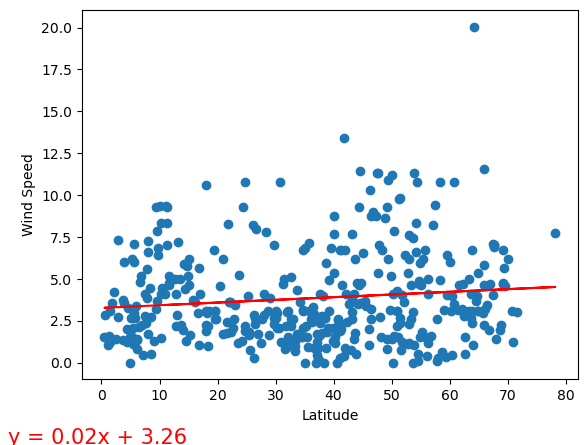

In [27]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed")

The r-value is: -0.1586598518336483


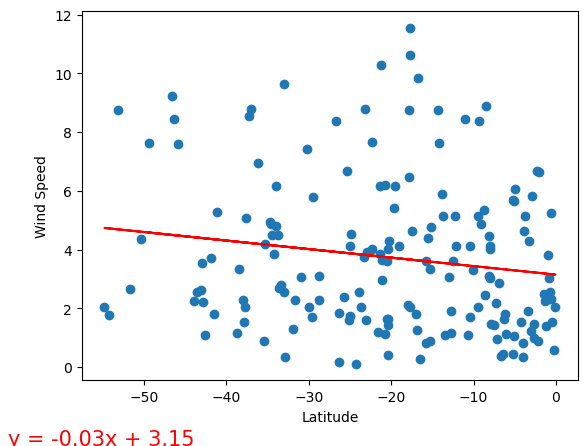

In [28]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed")

**Discussion about the linear relationship:** Linear regression suggests no or very weak relationship between windspeed and latitude in both the northern and southern hemispheres (r-values of 0.112 and -0.159, respectively).